[-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


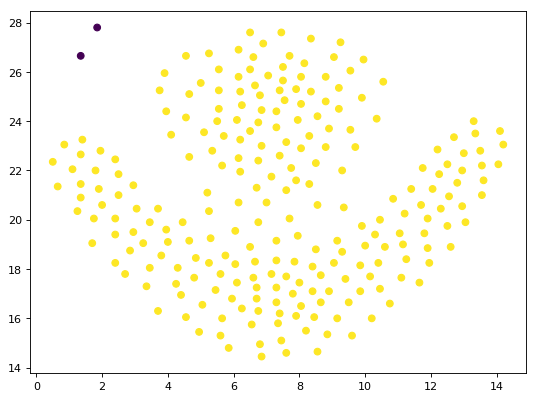

In [4]:
# encoding:utf-8
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from sklearn import datasets
 
list_1 = []
list_2 = []
# dataset1：隨機生成散點圖,參數為點的個數
# def scatter(num):
#     for i in range(num):
#         x = random.randint(0, 100)
#         list_1.append(x)
#         y = random.randint(0, 100)
#         list_2.append(y)
#     print(list_1)
#     print(list_2)
#     data = list(zip(list_1, list_2))
#     print(data)
#     #plt.scatter(list_1, list_2)
#     #plt.show()
#     return data
#scatter(50)
 
def loadDataSet(fileName, splitChar='\t'):
    dataSet = []
    with open(fileName) as fr:
        for line in fr.readlines():
            curline = line.strip().split(splitChar)
            fltline = list(map(float, curline))
            dataSet.append(fltline)
    return dataSet
 
# 計算兩個點之間的歐式距離，參數為兩個位元組
def dist(t1, t2):
    dis = math.sqrt((np.power((t1[0]-t2[0]),2) + np.power((t1[1]-t2[1]),2)))
    # print("兩個點之間的距離為："+str(dis))
    return dis
 
# dis = dist((1,1),(3,4))
# print(dis)
 
 
# DBSCAN算法，參數為dataset，Eps為指定半徑參數，MinPts為制定鄰域密度阈值
def dbscan(Data, Eps, MinPts):
    num = len(Data)  # 點的個數
    # print("点的个数："+str(num))
    unvisited = [i for i in range(num)]  # 没有訪問到的點的列表
    # print(unvisited)
    visited = []  # 已经訪問的點的列表
    C = [-1 for i in range(num)]
    # C為輸出結果，默認是一個長度為num的值全為-1的列表
    # 用k来標記不同的群集，k = -1表示噪音
    k = -1
    # 如果還有沒訪問的點
    while len(unvisited) > 0:
        # 隨機選擇一個unvisited對象
        p = random.choice(unvisited)
        unvisited.remove(p)
        visited.append(p)
        # N為p的epsilon鄰域中的對象的集合
        N = []
        for i in range(num):
            if (dist(Data[i], Data[p]) <= Eps):# and (i!=p):
                N.append(i)
        # 如果p的epsilon鄰域中的對象數大於指定阈值，说明p是一個核心對象
        if len(N) >= MinPts:
            k = k+1
            # print(k)
            C[p] = k
            # 對於p的epsilon鄰域中的每個對象pi
            for pi in N:
                if pi in unvisited:
                    unvisited.remove(pi)
                    visited.append(pi)
                    # 找到pi的鄰域中的核心對象，將這些對象放入N中
                    # M是位於pi的鄰域中的點的列表
                    M = []
                    for j in range(num):
                        if (dist(Data[j], Data[pi])<=Eps): #and (j!=pi):
                            M.append(j)
                    if len(M)>=MinPts:
                        for t in M:
                            if t not in N:
                                N.append(t)
                # 若pi不屬於任何族群，C[pi] == -1說明C中第pi个值沒有變動
                if C[pi] == -1:
                    C[pi] = k
        # 如果p的epsilon鄰域中的對象數小於指定阈值，說明p是一个噪音
        else:
            C[p] = -1
 
    return C
 
 
dataSet = loadDataSet('flame.csv', splitChar=',')
C = dbscan(dataSet, 2, 14)
print(C)
x = []
y = []
for data in dataSet:
    x.append(data[0])
    y.append(data[1])
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y, c=C, marker='o')
plt.show()
# print(x)
# print(y)